In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from calendar import monthrange

%matplotlib inline
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(12,8)})

## Задача проекта:
```
Провести разведывательный анализ, а также ответить на 6 вопросов, каждый из которых выделен в отдельный блок.
```

Сперва необходимо изучить колонки всех 3 таблиц, а также определить, что из имеющихся записей в таблице с заказами можно покупкой.

In [2]:
dir_path = '~/data_files/'

In [3]:
# Загружаем данные из таблицы заказов (orders) и изучаем их содержимое.

orders = pd.read_csv(dir_path + 'olist_orders_dataset.zip', compression='zip')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
# Переводим все даты из строкового в нужный формат.

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [5]:
# Загружаем данные из таблицы элементов заказа (order_items) и изучаем их содержимое.

order_items = pd.read_csv(dir_path + 'olist_order_items_dataset.zip', compression='zip')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
# Переводим все даты из строкового в нужный формат.

order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])
order_items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [7]:
# Загружаем данные из таблицы клиентов (customers) и изучаем их содержимое.

customers = pd.read_csv(dir_path + 'olist_customers_dataset.zip', compression='zip')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [8]:
# Посмотрим на количество различных значений в колонке order_status.

orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

Исходя из представленных данных, я решил считать покупкой заказ, статус которого относится к одной из следующих категорий: approved, processing, shipped, delivered. Подобное решение я принял, поскольку логично оплачивать заказ до того, как его одобрят, упакуют, отгрузят со склада и доставят покупателю.

**Список различных стадий, на которых может находиться заказ, и их взаимосвязь/очередность в последовательности:**

1) created

    заполненные поля: order_purchase_timestamp (пользователь только оформил заявку на покупку/заказ)

2) created -> invoiced
    
    заполненные поля: order_purchase_timestamp, order_approved_at (пользователю был выставлен счет сразу после оформления заявки)

3) created -> invoiced -> approved

    заполненные поля: order_purchase_timestamp, order_approved_at (покупатель успешно оплатил заказ)

4) created -> invoiced -> approved -> unavailable

    заполненные поля: order_purchase_timestamp, order_approved_at (продавец либо логистическая компания отказали в заказе в связи с отсутствием товара на складе; странно, что оплата к этому моменту уже произведена и только после этого выясняется, что товара на складе нет)

5) created -> invoiced -> approved -> processing

    заполненные поля: order_purchase_timestamp, order_approved_at (начался процесс сборки и упаковки всех элементов заказа на складе)

6) created -> invoiced -> approved -> processing -> shipped
    
    заполненные поля: order_purchase_timestamp, order_approved_at, order_delivered_carrier_date (заказ был отгружен со склада и начал свой путь до клиента)

7) created -> invoiced -> approved -> processing -> shipped -> delivered

    заполненные поля: order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date (заказ был доставлен пользователю логистической компанией)

8) created -> [любая опциональная промежуточная стадия, кроме 'unavailable'] -> canceled

    заполненные поля: order_purchase_timestamp (заказ на любой стадии может быть отменен клиентом; отмена после доставки заказа до покупателя может быть интерпретирована либо как желание клиента вернуть деньги за неподошедший заказ, либо как аномалия в данных)

In [9]:
# Создаём функцию аггрегирования статусов по признаку "оплачено":
# (1 - оплачено, 0 - не оплачено)

def check_if_payed(order_status):
    if (order_status == 'delivered' \
    or order_status == 'shipped' \
    or order_status == 'processing' \
    or order_status == 'approved'):
        return 1
    else:
        return 0

In [10]:
# Создаем столбец обозначающий то, является ли заказ оплаченным или нет.

orders['is_payed'] = orders.order_status.apply(check_if_payed)

In [11]:
# Смотрим на размер таблицы заказов.

orders.shape

(99441, 9)

In [12]:
 # Удаляем все дубликаты, если они вообще есть в таблице.

orders = orders.drop_duplicates()
orders.shape

(99441, 9)

In [13]:
# Проверим записи в таблице заказов на наличие пропущенных значений.
# Видим, что есть пропуски по некоторым датам.

orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
is_payed                            0
dtype: int64

In [14]:
# Выясним, за какой временной промежуток даны данные о покупках.

first_date = orders.order_purchase_timestamp.min().date()
last_date = orders.order_purchase_timestamp.max().date()
print('Дата первой покупки: ' + first_date.strftime('%d-%m-%Y'))
print('Дата последней покупки: ' + last_date.strftime('%d-%m-%Y'))

Дата первой покупки: 04-09-2016
Дата последней покупки: 17-10-2018


Нужно будет не забыть учесть, что первый и последний месяцы неполные.

In [15]:
# Смотрим на размер таблицы элементов заказа.

order_items.shape

(112650, 7)

In [16]:
# Удаляем все дубликаты, если они вообще есть в таблице.

order_items = order_items.drop_duplicates()
order_items.shape

(112650, 7)

In [17]:
# Проверим записи в таблице элементов заказа на наличие пропущенных значений.
# Видим, что пропуски отсутствуют.

order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [18]:
# Смотрим на размер таблицы клиентов.

customers.shape

(99441, 5)

In [19]:
# Удаляем все дубликаты, если они вообще есть в таблице.

customers = customers.drop_duplicates()
customers.shape

(99441, 5)

In [20]:
# Проверяем, что количество уникальных пользователей в таблице клиентов
# совпадает с числом строк (каждая запись относится к уникальному клиенту).

customers.customer_id.nunique()

99441

In [21]:
# Проверим записи в таблице клиентов на наличие пропущенных значений.
# Видим, что пропуски отсутствуют.

customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

**Аномалии в данных №1**

Несколько заказов в таблице orders со статусом "доставлено" не имеют времени подтверждения оплаты заказа, что подразумевает доставку клиенту заказа до оплаты заказа. Это должно быть связано с ошибкой при передачи информации в базу данных, при которой дата одобрения покупки не проставилась, однако дальнейшая цепочка действий с заказов продолжила работать и фиксироваться в БД.

In [22]:
orders.query('order_status == "delivered" and order_approved_at.isnull()')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_payed
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17,1
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21,1
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17,1
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31,1
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20,1
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01,1
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27,1
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22,1
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16,1
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20,1


**Аномалии в данных №2**

Несколько заказов в таблице orders со статусом "доставлено" не имеют времени доставки заказа (order_delivered_customer_date) и иногда даже времени передачи заказа в логистическую службу (order_delivered_carrier_date).

In [23]:
q = 'order_status == "delivered" and (order_delivered_customer_date.isnull() or order_delivered_carrier_date.isnull())'
orders.query(q)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_payed
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18,1
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16,1
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30,1
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14,1
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30,1
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24,1
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23,1
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26,1
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19,1


**Аномалии в данных №3**

Несколько заказов с различными статусами имеют одинаковые значения времени как для создания заказа, так и для подтверждения оплаты заказа; нет статусов "created" (что объясняется тем, что даты order_approved_at для этого заказа еще не существует), "approved" и "invoiced".

In [24]:
orders.query('order_purchase_timestamp == order_approved_at').order_status.value_counts()

delivered      1244
shipped          21
canceled         18
processing        8
unavailable       5
Name: order_status, dtype: int64

**Аномалии в данных №4**

Для нескольких заказов из таблицы orders со статусами "в пути" (shipped) или "доставлено" (delivered) подтверждение оплаты заказа наступило после передачи заказа в логистическую службу.

In [25]:
orders.query('order_approved_at > order_delivered_carrier_date').order_status.value_counts()

delivered    1350
shipped         9
Name: order_status, dtype: int64

In [26]:
# Объединим таблицы orders и order_items для дальнейшей работы с более полными данными по заказам.
# Здесь используется left join для сохранения 775 заказов, отсутствующих в таблице order_items.
extended_orders = orders.merge(order_items, on='order_id', how='left')

# Также объединим таблицы orders и customers для дальнейшей работы с более полными данными.
extended_orders = extended_orders.merge(customers, on='customer_id', how='inner')

# Некоторые столбцы можно благополучно отбросить в связи с их ненадобностью для дальнейшего анализа.
extended_orders = extended_orders.drop(columns=['customer_zip_code_prefix',
                                                'customer_city',
                                                'order_item_id', 'seller_id'])

# Добавим отдельное поле с месяцем и годом, когда был оформлен заказ на товар
# (при этом, наличие значения этого столбца не означает, что товар куплен).

extended_orders['order_month'] = extended_orders.order_purchase_timestamp.dt.to_period('M')
extended_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_payed,product_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_state,order_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,SP,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,BA,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,GO,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,RN,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,SP,2018-02


In [27]:
# Можно заметить, что даже у заказов со статусом "доставлено" есть пропуски
# по времени подтверждения оплаты заказа (order_approved_at), что было
# выявлено при первичном обследовании таблицы заказов на пропуски.
# Но так как мы принимаем решение об оплате по статусу заказов, это не должно стать проблемой при решении
# этой задачи.

extended_orders.loc[extended_orders.order_approved_at.isna()] \
                    .sort_values('is_payed', ascending=False)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_payed,product_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_state,order_month
55152,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16,1,c3b271f47e73d0c9ccf1b43b7606c705,2017-01-29 22:26:59,45.90,14.52,d49f3dae6bad25d05160fc17aca5942d,MG,2017-01
44820,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22,1,02a79d79e818ad0be36cfc843a6af7ad,2017-02-25 10:04:19,28.99,10.96,c4c0011e639bdbcf26059ddc38bd3c18,SP,2017-02
30541,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01,1,5ab02ca028398131a5ae91401eb49788,2017-01-23 12:48:08,39.99,14.52,6ff8b0d7b35d5c945633b8d60165691b,SP,2017-01
26359,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20,1,c6dd917a0be2a704582055949915ab32,2017-02-21 12:05:55,79.99,15.77,c8822fce1d0bfa7ddf0da24fff947172,RJ,2017-02
25796,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31,1,c6dd917a0be2a704582055949915ab32,2017-02-22 15:48:35,79.99,26.82,7e1a5ca61b572d76b64b6688b9f96473,CE,2017-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37336,4641a7999ca05850ee60509c213dc8ac,a7ff2f7795c7e202a24fc881252112bf,canceled,2017-11-20 12:48:37,NaT,NaT,NaT,2017-12-01,0,NaN,NaT,NaN,NaN,b0e767504f2f0d8ca90aa40c785d008e,SP,2017-11
38398,fd4c3a2912e854eedd463b329540da4b,d2fdd1d3725bccaa0900e360a985398f,canceled,2017-10-28 11:18:48,NaT,NaT,NaT,2017-11-21,0,NaN,NaT,NaN,NaN,d130666a33d3681209c5c752fe56ee10,PR,2017-10
38763,5aac76cf7b07dd06fa4d50bf461d2f40,7a8a02e54cf3472df427e927f8b9c046,canceled,2018-09-25 11:59:18,NaT,NaT,NaT,2018-10-11,0,NaN,NaT,NaN,NaN,9c3af16efacb7aa06aa3bc674556c5d6,MG,2018-09
38921,0ea5760bfbfe671160e0599cf68f1981,e016de14d2abd37825c4c485cd780b74,canceled,2018-07-18 09:56:16,NaT,NaT,NaT,2018-08-16,0,NaN,NaT,NaN,NaN,e7bb82dae3998954497289418e677dc2,RS,2018-07


In [28]:
# На всякий случай проверим дублирование информации группировкой покупок по времени оформления заказа.

same_time_orders = extended_orders.groupby('order_purchase_timestamp', as_index=False) \
    .agg({'order_id': 'nunique', 'customer_unique_id': 'nunique'}) \
    .rename(columns = {'order_id':'orders_cnt', 'customer_unique_id': 'unique_customers'}) \
    .sort_values('orders_cnt', ascending=False)
same_time_orders.head(20)

,order_purchase_timestamp,orders_cnt,unique_customers
80050,2018-06-01 13:39:44,3,1
91448,2018-07-28 13:11:22,3,3
68536,2018-04-11 10:48:14,3,3
92723,2018-08-02 12:06:09,3,3
92722,2018-08-02 12:06:07,3,3
66153,2018-03-31 15:08:21,3,1
35212,2017-11-20 10:59:08,3,3
35256,2017-11-20 11:46:30,3,3
56573,2018-02-19 15:37:47,3,3
92708,2018-08-02 12:05:26,3,3


Видим, что действительно есть покупки с совпадением по времени вплоть до секунд. Посмотрим на распределение количества одномоментых заказов. А также проверим, есть ли такие одномоментные заказы, которые оформлены разными уникальными пользователями.

In [29]:
same_time_orders.orders_cnt.value_counts()

1    98319
2      546
3       10
Name: orders_cnt, dtype: int64

In [30]:
same_time_orders.query('unique_customers > 1').unique_customers.value_counts()

2    258
3      8
Name: unique_customers, dtype: int64

## 1. Сколько у нас пользователей, которые совершили покупку только один раз?

Для ответа на поставленный вопрос необходимо подсчитать только заказы пользователей со статусами отличными от "canceled", "unavailable", "created", "invoiced". Достаточно обратиться к ранее созданному столбцу is_payed, содержащему информацию о том, оплатил ли клиент свой заказ. Далее сгруппируем данные по клиентам (customer_id) и подсчитаем, какое количество заказов (order_id) приходится на каждого покупателя. После этого останется лишь отфильтровать всех не подходящих нам клиентов (имеющих более одного заказа).

Однако важно помнить, что есть пользователи, которые совершили несколько одномоментных заказов. Сперва посчитаем эти заказы как разные.

In [31]:
# Вычисляем количество уникальных пользователей (customer_unique_id) с 1 совершённой покупкой
# (считаем несколько одномоментных покупок разными покупками).

extended_orders \
    .query('is_payed == 1') \
    .groupby(['customer_unique_id',
              'order_purchase_timestamp'], as_index=False) \
    .agg({'order_id':'nunique'}) \
    .rename(columns = {'order_id':'orders_cnt'}) \
    .query('orders_cnt == 1') \
    .customer_unique_id.nunique()

94439

А теперь, помимо первого варианта рассчёта, можно попробовать не делить покупки по заказам, если они сделаны одномоментно.

In [32]:
# Вычисляем количество уникальных пользователей (customer_unique_id) с 1 совершённой покупкой
# (считаем несколько одномоментных покупок одной покупкой).

extended_orders \
    .query('is_payed == 1') \
    .groupby('customer_unique_id', as_index=False) \
    .agg({'order_id':'nunique'}) \
    .rename(columns = {'order_id':'orders_cnt'}) \
    .query('orders_cnt == 1') \
    .shape[0]

91816

## 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

Недоставленный заказ - заказ, статус которого либо "отменён" (canceled), либо "недоступен" (unavailable).

In [33]:
undelivered_orders = extended_orders.query('order_status in ("canceled", "unavailable")').copy()
undelivered_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_payed,product_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_state,order_month
306,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,0,NaN,NaT,NaN,NaN,41fc647b8c6bd979b1b6364b60471b50,SC,2017-11
448,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14,0,ad673c1cd02b966e931f9db4fdc34791,2018-08-14 04:10:26,25.0,8.34,8ea097b1824dbd4d17af71b0afe04301,SP,2018-08
671,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,0,NaN,NaT,NaN,NaN,0e634b16e4c585acbd7b2e8276ce6677,SP,2018-01
705,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22,0,a0b7d5a992ccda646f2d34e418fff5a0,2018-02-01 21:58:39,69.9,26.11,c4ebedb09beb89cc0314c5c0c33f8053,SP,2018-01
791,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,0,NaN,NaT,NaN,NaN,596ed6d7a35890b3fbac54ec01f69685,SP,2017-08


In [34]:
extended_orders['total_shipping_diff'] = (extended_orders.order_delivered_customer_date - \
                          extended_orders.order_estimated_delivery_date).dt.days
late_cause_df = extended_orders.query('total_shipping_diff > 0').copy()
late_cause_df.total_shipping_diff.value_counts()

1.0      938
2.0      603
3.0      569
7.0      553
5.0      507
        ... 
162.0      1
85.0       1
75.0       1
165.0      1
91.0       1
Name: total_shipping_diff, Length: 115, dtype: int64

In [35]:
# Проверяем, какие статусы имеют задержанные заказы.

extended_orders.query('total_shipping_diff > 0').order_status.value_counts()

delivered    7264
canceled        1
Name: order_status, dtype: int64

In [36]:
# Проверяем, есть ли среди задержанных заказов неоплаченные.

late_cause_df.is_payed.value_counts()

1    7264
0       1
Name: is_payed, dtype: int64

Судя по тому, что всего один заказ неоплачен и отменён среди всех задержанных заказов, можно просто проигнорировать его и сказать, что у нас все имеющие задержку доставки заказы оплачены и меют статус "delivered".

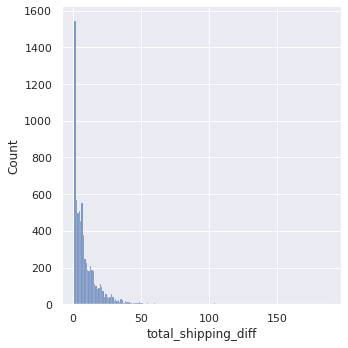

In [37]:
# Строим график распределения количества дней задержки доставки за весь период.

sns.displot(data=late_cause_df, x='total_shipping_diff')

In [38]:
# Для лучшего понимания распределения количества дней задержки доставки
# можно вывести информацию в разбивке по квантилям.

late_quant_25 = round(late_cause_df.total_shipping_diff.quantile(0.25))
late_quant_50 = round(late_cause_df.total_shipping_diff.quantile(0.5))
late_quant_75 = round(late_cause_df.total_shipping_diff.quantile(0.75))
print(f'25% опазданий доставки имеют срок задержки доставки заказа \
до {late_quant_25} дней')
print(f'50% опазданий доставки имеют срок задержки доставки заказа \
до {late_quant_50} дней')
print(f'75% опазданий доставки имеют срок задержки доставки заказа \
до {late_quant_75} дней')

25% опазданий доставки имеют срок задержки доставки заказа до 3 дней
50% опазданий доставки имеют срок задержки доставки заказа до 7 дней
75% опазданий доставки имеют срок задержки доставки заказа до 13 дней


Теперь можно от задержки перейти к требуемому анализу среднего количества заказов, которые не были доставлены (с детализацией причин).

In [39]:
# Для всех недоставленных заказов подсчитаем количество пропущенных значений всех видов дат,
# наиболее важных с точки зрения определения причины отмены доставки.

undelivered_orders[['order_purchase_timestamp',
                    'order_approved_at',
                    'order_delivered_carrier_date',
                    'order_delivered_customer_date']] \
.isnull().sum()

order_purchase_timestamp            0
order_approved_at                 141
order_delivered_carrier_date     1240
order_delivered_customer_date    1309
dtype: int64

In [40]:
# Подсчитаем сколько в среднем заказов в месяц не доставляется по различным причинам.

undelivered_orders_by_month = undelivered_orders \
    .groupby('order_month', as_index=False) \
    .agg({'order_id' : 'count'}) \
    .rename(columns = {'order_id':'orders_cnt'})

print('В среднем', 
      round(undelivered_orders_by_month.orders_cnt.mean()), 
      'заказов в месяц не доставляется по различным причинам.'
)

В среднем 55 заказов в месяц не доставляется по различным причинам.


Список причин:
1) заказ недоступен в связи с отсутствием товара на складе; количество подобных случаев = 610
2) заказ был отменен клиентом до оплаты, сразу после того, как был оформлен заказ; количество подобных отмен = 141
3) заказ был отменен клиентом после оплаты, но до того, как его успели вывести со склада; количество подобных отмен = 489
4) заказ был отменен клиентом уже после вывоза со склада, но еще до момента доставки заказа до клиента, что говорит о том, что клиенту возможно слишком долго пришлось ждать заказ и он успел передумать его покупать;
количество подобных отмен = 69
5) заказ был отменен клиентом уже после получения им доставки, что говорит о желании клиента вернуть деньги за 
неподошедший заказ; количество подобных отмен = 7


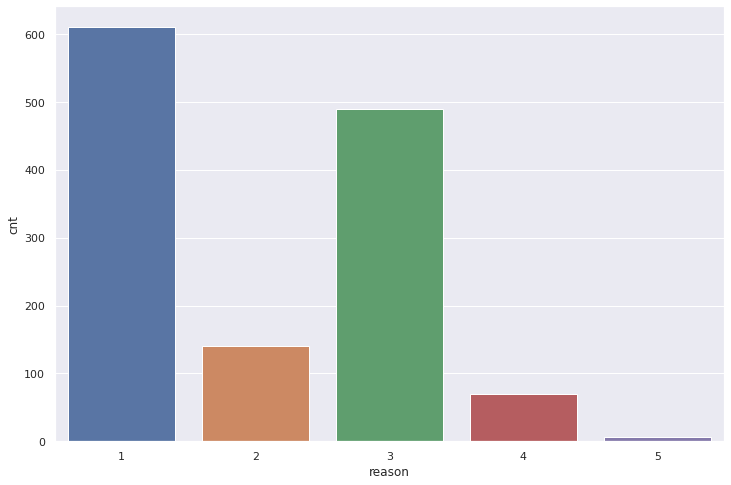

In [41]:
cond_list = [
    'order_status == "unavailable"',
    'order_status == "canceled" and order_approved_at.isnull()',
    'order_status == "canceled" and order_delivered_carrier_date.isnull() and order_approved_at.notnull()',
    'order_status == "canceled" and order_delivered_carrier_date.notnull() and order_delivered_customer_date.isnull() and order_approved_at.notnull()',
    'order_status == "canceled" and order_delivered_customer_date.notnull() and order_approved_at.notnull()'
]

undelivered_orders_dist = pd.DataFrame({'reason': [1, 2, 3, 4, 5],
    'cnt': [undelivered_orders.query(cond).shape[0] for cond in cond_list]})

# Перечислим причины, по которым не доставляется заказ, используя фильтрацию по пустым значениям дат.
# Нарисуем распределение количества недоставленных заказов.

print('Список причин:')
print('1) заказ недоступен в связи с отсутствием товара на складе; количество подобных случаев =',
      undelivered_orders_dist.query('reason == 1').cnt.values[0])
print('2) заказ был отменен клиентом до оплаты, сразу после того, как был оформлен заказ; количество подобных отмен =',
      undelivered_orders_dist.query('reason == 2').cnt.values[0])
print('3) заказ был отменен клиентом после оплаты, но до того, как его успели вывести со склада; количество подобных отмен =',
      undelivered_orders_dist.query('reason == 3').cnt.values[0])
print('4) заказ был отменен клиентом уже после вывоза со склада, но еще до момента доставки заказа до клиента, что говорит о том, что клиенту возможно слишком долго пришлось ждать заказ и он успел передумать его покупать;\nколичество подобных отмен =',
      undelivered_orders_dist.query('reason == 4').cnt.values[0])
print('5) заказ был отменен клиентом уже после получения им доставки, что говорит о желании клиента вернуть деньги за \nнеподошедший заказ; количество подобных отмен =',
      undelivered_orders_dist.query('reason == 5').cnt.values[0])

sns.barplot(data=undelivered_orders_dist, x='reason', y='cnt')

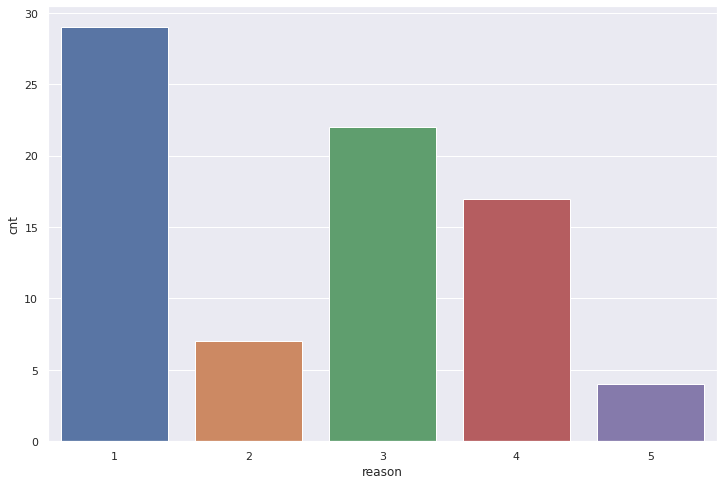

In [42]:
# В заключении нарисуем распределение среднемесячного количества недоставленных заказов.

undelivered_orders_dist = pd.DataFrame({'reason': [1, 2, 3, 4, 5],
    'cnt': [round(undelivered_orders.query(cond) \
        .groupby('order_month', as_index=False) \
        .agg({'order_id' : 'count'}) \
        .rename(columns = {'order_id':'orders_cnt'}) \
        .orders_cnt.mean()
        ) for cond in cond_list]
    })

sns.barplot(data=undelivered_orders_dist, x='reason', y='cnt')

По обеим диаграммам видно, что основными причинами являются причина №1 (заказ недоступен в связи с отсутствием товара на складе), а также причина №3 (заказ был отменен клиентом после оплаты, но до того, как его успели вывести со склада). Если первую причину можно решить увеличением запасов на складе, то вторую вряд ли удастся исправить. Разве что советовать клиентам более вдумчиво выбирать товары и не делать импульсивных покупок.

## 3. По каждому товару определить, в какой день недели товар чаще всего покупается.

In [43]:
# Добавим поле weekday, отражающее день недели, когда был совершен заказ (order_purchase_timestamp)

extended_orders['weekday'] = extended_orders \
.order_purchase_timestamp.dt.day_name()

extended_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_payed,product_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_state,order_month,total_shipping_diff,weekday
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,SP,2017-10,-8.0,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,BA,2018-07,-6.0,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,GO,2018-08,-18.0,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,RN,2017-11,-13.0,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,SP,2018-02,-10.0,Tuesday


In [44]:
# Сгруппируем данные по id продукта и дню недели, после чего подсчитаем количество заказов для каждой такой пары.
# Отсортируем по убыванию количества заказов для каждого продукта, чтобы можно было легко выбрать
# строку с максимальным количеством заказов и соответствующим днём недели для продукта.

purchases_grouped_by_product_and_weekday = extended_orders \
.query('order_purchase_timestamp.notna() and order_approved_at.notna() and product_id.notna() and order_status not in ("canceled", "unavailable")') \
.groupby(['product_id', 'weekday'], as_index=False) \
.agg({'order_id':'count'}) \
.rename(columns = {'order_id':'orders_cnt'}) \
.sort_values(['product_id', 'orders_cnt'], ascending=[False, False]).copy()

purchases_grouped_by_product_and_weekday.head()

,product_id,weekday,orders_cnt
60880,fffe9eeff12fcbd74a2f2b007dde0c58,Wednesday,1
60879,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday,2
60876,fffdb2d0ec8d6a61f0a0a0db3f25b441,Friday,1
60877,fffdb2d0ec8d6a61f0a0a0db3f25b441,Sunday,1
60878,fffdb2d0ec8d6a61f0a0a0db3f25b441,Thursday,1


In [45]:
# Сгруппируем по id продукта полученный на предыдущем шаге датафрейм.
# Затем выберем самую верхнюю строку (содержащую благодаря сортировке максимальное количество заказов)
# в границах данных каждого из продуктов, и наконец отсортируем по убыванию количества заказов.

bought_products_per_weekday = purchases_grouped_by_product_and_weekday \
.groupby('product_id') \
.apply(lambda df: df[['weekday', 'orders_cnt']].iloc[0]) \
.reset_index().copy()

# В качестве ответа выведем первые 10 строк итогового датафрейма.
bought_products_per_weekday.sort_values('orders_cnt', ascending=False).head(10)


,product_id,weekday,orders_cnt
8553,422879e10f46682990de24d770e7f83d,Wednesday,93
19597,99a4788cb24856965c36a24e339b6058,Monday,92
21957,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
10787,53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
7032,368c6c730842d78016ad823897a372db,Friday,67
7313,389d119b48cf3043d311335e499d9c6b,Thursday,67
10760,53759a2ecddad2bb87a079a1f1519f73,Wednesday,66
26856,d1c427060a0f73f6b889a5c7c61f2ac4,Monday,64
7996,3dd2a17168ec895c781a9191c1e95ad7,Wednesday,54
2777,154e7e31ebfa092203795c972e5804a6,Wednesday,49


In [46]:
# Дополнительно преобразуем датафрейм, чтобы он для каждого дня недели показывал суммарное
# количество покупок всех товаров, соершённых в этот день.

bought_products_per_weekday.groupby(['weekday'], as_index=False) \
.agg({'orders_cnt':'sum'}) \
.sort_values('orders_cnt', ascending=False)

,weekday,orders_cnt
1,Monday,11011
0,Friday,9394
5,Tuesday,8375
4,Thursday,7762
6,Wednesday,7421
3,Sunday,5643
2,Saturday,5172


## 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?

In [47]:
# Сначала для каждого из пользователей посчитаем количество покупок по месяцам.

total_purchases_per_user_per_month = extended_orders \
.query('is_payed == 1 and customer_id.notna()') \
.groupby(['customer_unique_id', 'order_month'], as_index=False) \
.agg({'order_id':'count'}) \
.rename(columns = {'order_id':'total_purchases'}) \
.sort_values('total_purchases', ascending=False) \
.copy()
total_purchases_per_user_per_month.head()

,customer_unique_id,order_month,total_purchases
75636,c8460e4251689ba205045f3ea17884a1,2018-08,24
26184,4546caea018ad8c692964e3382debd19,2017-07,21
39913,698e1cf81d01a3d389d96145f7fa6df8,2017-08,20
74032,c402f431464c72e27330a67f7b94d4fb,2018-02,20
5817,0f5ac8d5c31de21d2f25e24be15bbffb,2017-11,18


In [48]:
# Посчитаем количество дней в месяце, а затем разделим это количество дней
# на количество дней в неделе для получения количества недель в месяце.

total_purchases_per_user_per_month['days_in_month'] = total_purchases_per_user_per_month \
.apply(lambda row: monthrange(
    row['order_month'].year,
    row['order_month'].month
)[1], axis=1)
total_purchases_per_user_per_month['weeks_in_month'] = total_purchases_per_user_per_month['days_in_month'] / 7
total_purchases_per_user_per_month.head()

,customer_unique_id,order_month,total_purchases,days_in_month,weeks_in_month
75636,c8460e4251689ba205045f3ea17884a1,2018-08,24,31,4.428571
26184,4546caea018ad8c692964e3382debd19,2017-07,21,31,4.428571
39913,698e1cf81d01a3d389d96145f7fa6df8,2017-08,20,31,4.428571
74032,c402f431464c72e27330a67f7b94d4fb,2018-02,20,28,4.000000
5817,0f5ac8d5c31de21d2f25e24be15bbffb,2017-11,18,30,4.285714


In [49]:
# Для ответа на вопрос разделим количество покупок в месяц на количество недель в месяце для получения
# среднего количества покупок в неделю и отсортируем по убыванию значений нового поля.

total_purchases_per_user_per_month['avg_purchases_per_week'] = \
    total_purchases_per_user_per_month.total_purchases / total_purchases_per_user_per_month.weeks_in_month

# Для демонстрации можно вывести топ 10 клиентов по средне-недельному количеству покупок.
demo = total_purchases_per_user_per_month.copy()
demo['avg_purchases_per_week'] = round(demo['avg_purchases_per_week'], 1)
demo.sort_values('avg_purchases_per_week', ascending=False).head(10)

,customer_unique_id,order_month,total_purchases,days_in_month,weeks_in_month,avg_purchases_per_week
75636,c8460e4251689ba205045f3ea17884a1,2018-08,24,31,4.428571,5.4
74032,c402f431464c72e27330a67f7b94d4fb,2018-02,20,28,4.000000,5.0
26184,4546caea018ad8c692964e3382debd19,2017-07,21,31,4.428571,4.7
39913,698e1cf81d01a3d389d96145f7fa6df8,2017-08,20,31,4.428571,4.5
5817,0f5ac8d5c31de21d2f25e24be15bbffb,2017-11,18,30,4.285714,4.2
93582,f7ea4eef770a388bd5b225acfc546604,2018-02,14,28,4.000000,3.5
6844,11f97da02237a49c8e783dfda6f50e8e,2017-01,15,31,4.428571,3.4
18899,31e412b9fb766b6794724ed17a41dfa6,2017-12,14,31,4.428571,3.2
44409,7582a5a77fc2976628f46a13ec91b375,2018-04,13,30,4.285714,3.0
82125,d97b3cfb22b0d6b25ac9ed4e9c2d481b,2017-10,13,31,4.428571,2.9


In [50]:
bad_weeks = demo.query('avg_purchases_per_week < 1')
bad_weeks['avg_purchases_per_week'].value_counts()

0.2    85930
0.5     8127
0.7     1345
0.9      513
0.8      127
Name: avg_purchases_per_week, dtype: int64

In [51]:
bad_weeks['order_month'].value_counts()

2017-11    7242
2018-01    7041
2018-03    7019
2018-04    6806
2018-05    6709
2018-02    6383
2018-08    6329
2018-07    6130
2018-06    6072
2017-12    5521
2017-10    4441
2017-08    4158
2017-09    4117
2017-07    3850
2017-05    3543
2017-06    3124
2017-03    2564
2017-04    2324
2017-02    1667
2017-01     729
2016-10     269
2016-09       2
2018-09       1
2016-12       1
Freq: M, Name: order_month, dtype: int64

Поскольку первый и последний месяцы неполные, как мы помним по разведывательному анализу, то их лучше будет исключить.

In [52]:
first_order_month = extended_orders.order_month.min()
last_order_month = extended_orders.order_month.max()
print('Месяц и год первой покупки: ' + first_order_month.strftime('%m-%Y'))
print('Месяц и год последней покупки: ' + last_order_month.strftime('%m-%Y'))

Месяц и год первой покупки: 09-2016
Месяц и год последней покупки: 10-2018


In [53]:
total_purchases_per_user_per_month = total_purchases_per_user_per_month \
    .loc[(total_purchases_per_user_per_month.order_month > first_order_month) & (total_purchases_per_user_per_month.order_month < last_order_month)].copy()
total_purchases_per_user_per_month.head()

,customer_unique_id,order_month,total_purchases,days_in_month,weeks_in_month,avg_purchases_per_week
75636,c8460e4251689ba205045f3ea17884a1,2018-08,24,31,4.428571,5.419355
26184,4546caea018ad8c692964e3382debd19,2017-07,21,31,4.428571,4.741935
39913,698e1cf81d01a3d389d96145f7fa6df8,2017-08,20,31,4.428571,4.516129
74032,c402f431464c72e27330a67f7b94d4fb,2018-02,20,28,4.000000,5.000000
5817,0f5ac8d5c31de21d2f25e24be15bbffb,2017-11,18,30,4.285714,4.200000


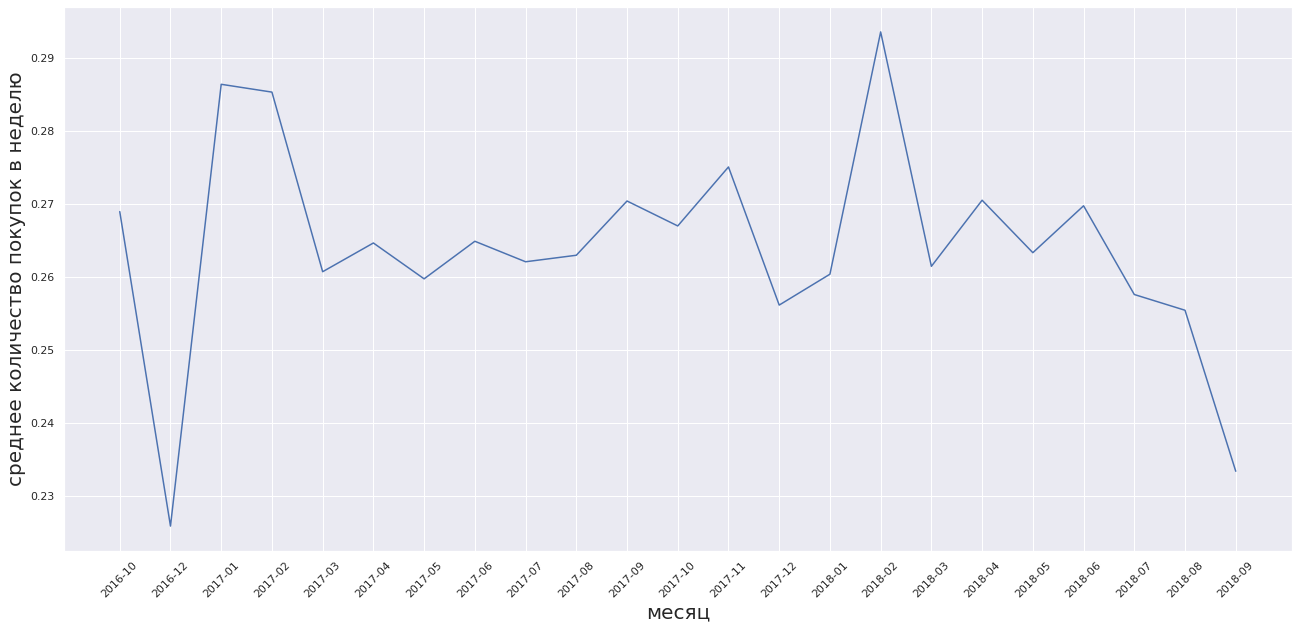

In [54]:
# Дополнительно можно построить график, отражающий распределение среднего количества покупок всех клиентов
# в неделю с разбивкой по месяцам.

avg_purchases_per_week_per_month = total_purchases_per_user_per_month.groupby('order_month', as_index=False) \
.agg({'avg_purchases_per_week':'mean'}) \
.sort_values('order_month') \
.copy()

plt.figure(figsize=(22,10))
plt.xticks(rotation=45)
lnplot = sns.lineplot(x=avg_purchases_per_week_per_month['order_month'].astype('str'), 
             y=avg_purchases_per_week_per_month['avg_purchases_per_week'])
lnplot.set_xlabel("месяц", fontsize=20)
lnplot.set_ylabel("среднее количество покупок в неделю", fontsize=20)
plt.show()

## 5. Провести когортный анализ пользователей. В период с января по декабрь выявить когорту с самым высоким retention на 3-й месяц.

In [55]:
# Создадим поле cohort, содержащее самый давний для каждого покупателя месяц и год покупки товаров.

extended_orders['cohort'] = extended_orders.groupby('customer_unique_id')['order_purchase_timestamp'] \
                 .transform('min') \
                 .dt.to_period('M')
extended_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_payed,product_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_state,order_month,total_shipping_diff,weekday,cohort
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,SP,2017-10,-8.0,Monday,2017-09
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,BA,2018-07,-6.0,Tuesday,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,GO,2018-08,-18.0,Wednesday,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,RN,2017-11,-13.0,Saturday,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,SP,2018-02,-10.0,Tuesday,2018-02


In [56]:
# Подсчитаем процент покупателей, которые совершили более одного заказа.

n_orders = extended_orders.groupby('customer_unique_id')['order_id'].nunique()
mult_orders_perc = np.sum(n_orders > 1) / extended_orders['customer_unique_id'].nunique() * 100

print(str(round(mult_orders_perc, 2)) + '% покупателей, которые совершили более 1 заказа.')

3.12% покупателей, которые совершили более 1 заказа.


In [57]:
from operator import attrgetter

# Cгруппируем заказы по когорте и месяцу оформления заказа, подсчитав количество уникальных пользователей.
df_cohort = extended_orders.groupby(['cohort', 'order_month'], as_index=False) \
              .agg(n_customers=('customer_unique_id', 'nunique')) \
              .reset_index(drop=False) \
              .sort_values(['cohort', 'order_month'])

# Добавим поле period_number, которое равняется количеству месяцев между месяцем формирования когорты
# и месяцем покупки.
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))
df_cohort.head()

,index,cohort,order_month,n_customers,period_number
0,0,2016-09,2016-09,4,0
1,1,2016-10,2016-10,321,0
2,2,2016-10,2017-04,1,6
3,3,2016-10,2017-07,1,9
4,4,2016-10,2017-09,1,11


In [58]:
# Построим сводную таблицу, где строками будут когорты, колонками - количество месяцев
# между месяцем формирования когорты и месяцем покупки, а значениями - количество уникальных пользователей.
# Все пустые значения заполним нулями.

cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers') \
.fillna(0)

# Далее необходимо преобразовать абсолютные значения в относительные (процент удержания).
# В качестве размера когорты, на который будут делиться все соответствующие конкретной когорте столбцы,
# выступает значение в нулевом столбце (поэтому там все значения равны 100%).
cohort_size = cohort_pivot.iloc[:,0].copy()

# Чтобы значения были выражены в процентах необходимо умножить cohort_size на 1/100.
retention_matrix = cohort_pivot.divide(cohort_size * 0.01, axis = 0)
retention_matrix

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort,,,,,,,,,,,,,,,,,,,,
2016-09,100.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-10,100.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.311526,0.000000,0.000000,0.311526,0.000000,0.311526,0.000000,0.311526,0.000000,0.311526,0.000000,0.311526,0.623053,0.623053
2016-12,100.0,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01,100.0,0.392670,0.261780,0.130890,0.392670,0.130890,0.523560,0.130890,0.130890,0.000000,0.392670,0.130890,0.785340,0.392670,0.130890,0.130890,0.261780,0.392670,0.130890,0.000000
2017-02,100.0,0.228311,0.285388,0.114155,0.399543,0.114155,0.228311,0.171233,0.171233,0.228311,0.114155,0.285388,0.171233,0.171233,0.114155,0.057078,0.057078,0.228311,0.000000,0.000000
2017-03,100.0,0.493171,0.379363,0.379363,0.341426,0.151745,0.151745,0.303490,0.341426,0.075873,0.379363,0.151745,0.227618,0.113809,0.151745,0.227618,0.075873,0.151745,0.000000,0.000000
2017-04,100.0,0.595238,0.212585,0.170068,0.340136,0.255102,0.340136,0.297619,0.297619,0.170068,0.255102,0.085034,0.085034,0.042517,0.085034,0.085034,0.212585,0.000000,0.000000,0.000000
2017-05,100.0,0.500556,0.500556,0.389321,0.305895,0.333704,0.417130,0.166852,0.250278,0.305895,0.250278,0.333704,0.250278,0.027809,0.194661,0.250278,0.000000,0.000000,0.000000,0.000000
2017-06,100.0,0.477859,0.350430,0.414145,0.254858,0.382287,0.382287,0.223001,0.127429,0.223001,0.318573,0.350430,0.159286,0.127429,0.191144,0.000000,0.000000,0.000000,0.000000,0.000000


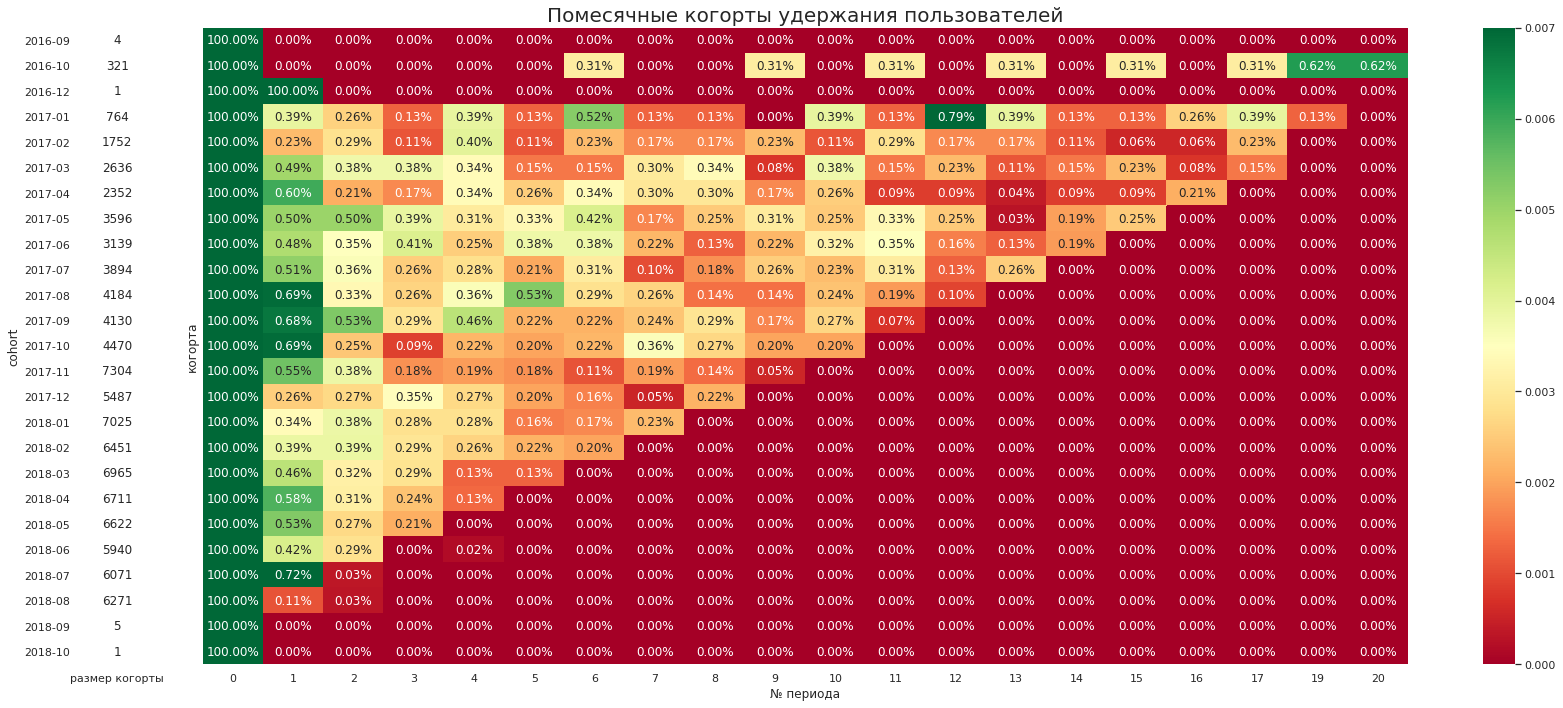

In [59]:
import matplotlib.colors as mcolors

# Построим тепловую карту матрицы удержания.
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(24, 10), sharey=True, gridspec_kw={'width_ratios': [1, 20]})
    
    # матрица удержания
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                robust=False,
                fmt='.2%',
                cmap='RdYlGn',
                vmin=0, 
                vmax=0.007,
                ax=ax[1])
    ax[1].set_title('Помесячные когорты удержания пользователей', fontsize=20)
    ax[1].set(xlabel='№ периода',
              ylabel='когорта')

    # размер когорты
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'размер когорты'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

In [60]:
# Отберем из матрицы удержания только колонки со значением года и месяца когорты, и третьего месяца.
retention_matrix = retention_matrix.reset_index()[['cohort', 3]]

# Создадим дополнительное поле cohort_year, содержащее лишь год когорты, после чего
# разобъём данные по годам с подсчетом максимального значения retention rate на 3-й месяц.
retention_matrix['cohort_year'] = retention_matrix['cohort'].dt.year
max_retention_on_third_month_per_year = retention_matrix.rename(columns={3 : 'retention'}) \
         .groupby('cohort_year', as_index=False) \
         .agg({'retention': 'max'}) \
         .rename(columns={'retention' : 'max_retention_on_third_month'}) \
         .query('cohort_year != 2016') \
         .sort_values('cohort_year')

# Максимальное значение retention rate (выраженное в процентах после умножения на 100)
# на 3-й месяц округлим до 2 знаков после точки, после чего преобразуем к строке,
# чтобы добавить символ процента для наглядности.
max_retention_on_third_month_per_year['max_retention_on_third_month'] = \
    round(max_retention_on_third_month_per_year['max_retention_on_third_month'] * 100, 2).astype('str') + '%'
max_retention_on_third_month_per_year

,cohort_year,max_retention_on_third_month
1,2017,0.41%
2,2018,0.29%


Когортой с самым высоким retention rate на 3-й месяц в периоде с января по декабрь, является группа пользователей "2017-06" с retention rate = 0.41%

## 6. Построить RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. Для каждого RFM-сегмента построить границы метрик recency, frequency и monetary для интерпретации кластеров.

In [61]:
# Исключим информацию о заказах, цену товара в которых мы не знаем, а также
# о заказах, id клиента в которых мы не знаем, поскольку в противном случае
# это помешает подсчитать параметры, необходимые для RFM-анализа.

extended_orders = extended_orders.dropna(subset=['customer_unique_id', 'price'])
extended_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_payed,product_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_state,order_month,total_shipping_diff,weekday,cohort
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,SP,2017-10,-8.0,Monday,2017-09
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,BA,2018-07,-6.0,Tuesday,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,GO,2018-08,-18.0,Wednesday,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,RN,2017-11,-13.0,Saturday,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,SP,2018-02,-10.0,Tuesday,2018-02


In [62]:
# Подготовим датафрейм для RFM-анализа с помощью группировки по id заказа, дате совершения покупки
# и уникальному id пользователя с дальнейшим подсчетом суммарной стоимости и количества заказов.

rfm_prep_df = extended_orders.groupby(['order_id', 'order_purchase_timestamp', 'customer_unique_id']) \
.agg({'price': 'sum', 'order_status': 'count'}) \
.rename(columns = {'order_status':'num_of_purchases'}) \
.reset_index()

# Посмотрим на строки полученного датафрейма с количеством заказов более одного.
rfm_prep_df.query('num_of_purchases > 1').sort_values('num_of_purchases', ascending=False).head()

,order_id,order_purchase_timestamp,customer_unique_id,price,num_of_purchases
50137,8272b63d03f5f79c56e9e4120aec44ef,2017-07-16 18:19:25,4546caea018ad8c692964e3382debd19,31.80,21
65715,ab14fdcfbe524636d65ee38360e22ce8,2017-08-23 09:22:34,698e1cf81d01a3d389d96145f7fa6df8,1974.00,20
10459,1b15974a0141d54e36626dca3fdc731a,2018-02-22 15:30:41,c402f431464c72e27330a67f7b94d4fb,2000.00,20
60941,9ef13efd6949e4573a18964dd1bbe7f5,2017-01-30 21:44:49,11f97da02237a49c8e783dfda6f50e8e,765.00,15
25583,428a2f660dc84138d969ccd69a0ab6d5,2017-11-23 20:30:52,0f5ac8d5c31de21d2f25e24be15bbffb,982.35,15


In [63]:
# рассчитаем "текущую" дату (дату, от которой будет вестись подсчет давности совершения покупки),
# добавив один день к самой поздней (максимальной) дате покупки.

NOW = rfm_prep_df['order_purchase_timestamp'].max() + timedelta(days=1)
NOW

Timestamp('2018-09-04 09:06:57')

In [64]:
# Произведём подсчет давности совершения каждой из покупок и добавим полученное значение
# в новое поле days_since_order.

rfm_prep_df['days_since_order'] = rfm_prep_df['order_purchase_timestamp'].apply(lambda x: (NOW - x).days)
rfm_prep_df.head()

,order_id,order_purchase_timestamp,customer_unique_id,price,num_of_purchases,days_since_order
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,58.90,1,356
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,239.90,1,495
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,199.00,1,232
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,12.99,1,26
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,199.90,1,576


In [65]:
# Получим числовые значения всех характеристик/компонентов RFM.

aggr = {
    'days_since_order': 'min',  # время от последней покупки пользователя до текущей даты (recency)
    'order_id': 'count', # суммарное количество покупок у пользователя за всё время (frequency)
    'price': 'sum' # сумма денег, на которую пользователь совершил покупки, за всё время (monetary)
}

rfm = rfm_prep_df.groupby('customer_unique_id', as_index=False).agg(aggr)
rfm = rfm.rename(columns={'days_since_order': 'recency', 'order_id': 'frequency',
                          'price': 'monetary'})
rfm.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00


In [66]:
rfm.recency.value_counts().sort_values(ascending=False)

283    1045
284     433
282     415
281     390
280     374
       ... 
604       3
729       2
1         1
701       1
718       1
Name: recency, Length: 614, dtype: int64

In [67]:
rfm.recency.describe()

count    95420.000000
mean       243.600377
std        153.160320
min          1.000000
25%        119.000000
50%        224.000000
75%        353.000000
max        729.000000
Name: recency, dtype: float64

In [68]:
rfm.frequency.value_counts().sort_values(ascending=False)

1     92507
2      2673
3       192
4        29
5         9
6         5
7         3
9         1
16        1
Name: frequency, dtype: int64

In [69]:
rfm.frequency.describe()

count    95420.000000
mean         1.034018
std          0.211234
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         16.000000
Name: frequency, dtype: float64

In [70]:
rfm.monetary.describe()

count    95420.000000
mean       142.440198
std        217.656355
min          0.850000
25%         47.900000
50%         89.900000
75%        155.000000
max      13440.000000
Name: monetary, dtype: float64

Для параметров recency и monetary есть смысл использовать квартили, для деления на сегменты.
Для параметра frequency не получится использовать квартили из-за того, что все они равны 1, поэтому к нему отдельно будет применен свой метод категоризации:
frequency = 1         -> 1
2 <= frequency <= 3   -> 2
4 <= frequency <= 6   -> 3
frequency >= 7        -> 4

In [71]:
print('сегмент f = 1: клиент совершил лишь 1 покупку')
print('сегмент f = 2: клиент совершил от 2 до 3 покупок')
print('сегмент f = 3: клиент совершил от 4 до 6 покупок')
print('сегмент f = 4: клиент совершил 7 или более покупок')

quartile = rfm[['recency', 'monetary']].quantile([.25, .5, .75]).to_dict()

print('сегмент r = 4: клиент последний раз совершал покупку от 1 до', round(quartile['recency'][0.25]), 'дней назад')
print('сегмент r = 3: клиент последний раз совершал покупку от', round(quartile['recency'][0.25]) + 1, 'до', round(quartile['recency'][0.5]), 'дней назад')
print('сегмент r = 2: клиент последний раз совершал покупку от', round(quartile['recency'][0.5]) + 1, 'до', round(quartile['recency'][0.75]), 'дней назад')
print('сегмент r = 1: клиент последний раз совершал покупку более', round(quartile['recency'][0.75]), 'дней назад')

print('сегмент m = 1: клиент совершил покупки на сумму до', round(quartile['monetary'][0.25]), 'долларов')
print('сегмент m = 2: клиент совершил покупки на сумму от', round(quartile['monetary'][0.25]) + 1, 'до', round(quartile['monetary'][0.5]), 'долларов')
print('сегмент m = 3: клиент совершил покупки на сумму от', round(quartile['monetary'][0.5]) + 1, 'до', round(quartile['monetary'][0.75]), 'долларов')
print('сегмент m = 4: клиент совершил покупки на сумму свыше', round(quartile['monetary'][0.75]), 'долларов')


сегмент f = 1: клиент совершил лишь 1 покупку
сегмент f = 2: клиент совершил от 2 до 3 покупок
сегмент f = 3: клиент совершил от 4 до 6 покупок
сегмент f = 4: клиент совершил 7 или более покупок
сегмент r = 4: клиент последний раз совершал покупку от 1 до 119 дней назад
сегмент r = 3: клиент последний раз совершал покупку от 120 до 224 дней назад
сегмент r = 2: клиент последний раз совершал покупку от 225 до 353 дней назад
сегмент r = 1: клиент последний раз совершал покупку более 353 дней назад
сегмент m = 1: клиент совершил покупки на сумму до 48 долларов
сегмент m = 2: клиент совершил покупки на сумму от 49 до 90 долларов
сегмент m = 3: клиент совершил покупки на сумму от 91 до 155 долларов
сегмент m = 4: клиент совершил покупки на сумму свыше 155 долларов


In [72]:
# Определим функции для подсчёта RFM-score.

# Чем ниже значение, тем лучше (ближе к 4)
def r_score(x):
    if x <= quartile['recency'][.25]:
        return 4
    elif x <= quartile['recency'][.5]:
        return 3
    elif x <= quartile['recency'][.75]:
        return 2
    else:
        return 1

# Чем выше значение, тем лучше (ближе к 4)
def f_score(x):
    if x <= 1:
        return 1
    elif x <= 3:
        return 2
    elif x <= 6:
        return 3
    else:
        return 4

# Чем выше значение, тем лучше (ближе к 4)
def m_score(x):
    if x <= quartile['monetary'][.25]:
        return 1
    elif x <= quartile['monetary'][.5]:
        return 2
    elif x <= quartile['monetary'][.75]:
        return 3
    else:
        return 4


In [73]:
# Применим описанные выше функции к полям recency, frequency и monetary для создания
# соответствующих очков (RFM-score).

rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: f_score(x))
rfm['M'] = rfm['monetary'].apply(lambda x: m_score(x))
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,4,1,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,4


Также создадим поля, содержащие как RFM-сегмент, так и итоговое значение RFM-score. Количество уникальных сегментов = 4^3 = 64, однако некоторые из них будут частью большего сегмента, что позволит описать существенно меньшее количество уникальных сегментов.

In [74]:
rfm['RFM_segment'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm['RFM_score'] = round((rfm['R'] + rfm['F'] + rfm['M']) / 3, 2)
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_segment,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,4,1,3,413,2.67
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1,411,2.00
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,112,1.33
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211,1.33
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,4,214,2.33


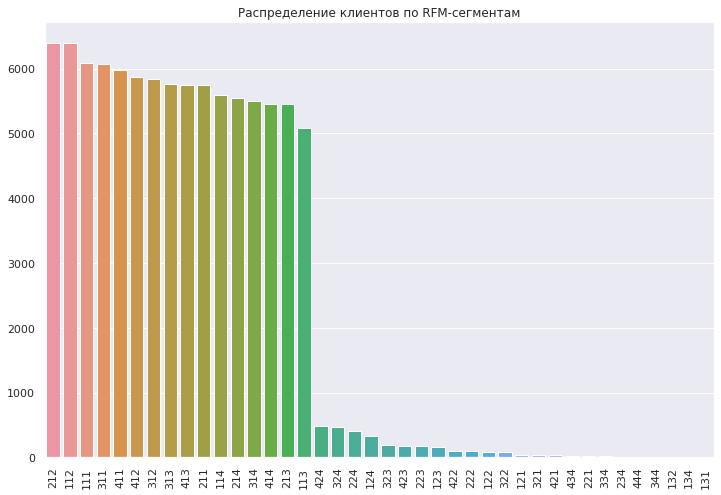

In [75]:
# Взглянем на распределение клиентов по RFM-сегментам.

ax = sns.countplot(x=rfm['RFM_segment'], order=rfm['RFM_segment'].value_counts().index)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Распределение клиентов по RFM-сегментам')
ax.tick_params(axis='x', rotation=90)

In [76]:
# Теперь посмотрим на распределение значений RFM-score.

rfm.RFM_score.value_counts()

2.00    23151
2.33    17795
1.67    17651
1.33    12169
2.67    11938
3.00     6108
1.00     6081
3.33      502
3.67       22
4.00        3
Name: RFM_score, dtype: int64

Text(0.5, 1.0, 'Распределение RFM-score клиентов')

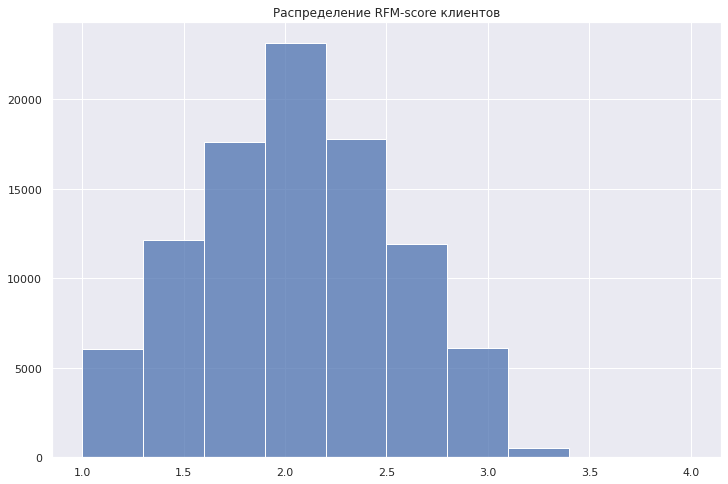

In [77]:
ax = sns.histplot(data=rfm, x='RFM_score', bins=10)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Распределение RFM-score клиентов')

In [78]:
# На основе значения RFM-score можно получить следующее распределение по квантилям.

for i in range(10):
    q = (i+1)/10
    RFM_score_quantile = round(rfm.RFM_score.quantile(q), 2)
    print(f'{round(q*100)}% клиентов имеют RFM-score не более {RFM_score_quantile};')

10% клиентов имеют RFM-score не более 1.33;
20% клиентов имеют RFM-score не более 1.67;
30% клиентов имеют RFM-score не более 1.67;
40% клиентов имеют RFM-score не более 2.0;
50% клиентов имеют RFM-score не более 2.0;
60% клиентов имеют RFM-score не более 2.0;
70% клиентов имеют RFM-score не более 2.33;
80% клиентов имеют RFM-score не более 2.33;
90% клиентов имеют RFM-score не более 2.67;
100% клиентов имеют RFM-score не более 4.0;


```
Используем регулярные выражения для сегментации пользователей на RFM-сегменты.
Описание всех RFM-сегментов:
1) худшие - пользователи, очень давно купившие совсем мало дешевых товаров;
2) спящие - пользователи, очень давно покупавшие несколько не очень дешевых товаров или мало товаров средней цены;
3) могут заснуть - пользователи, давно купившие какие-то не самые дорогие товары;
4) нельзя терять - пользователи, очень давно покупавшие несколько дорогих товаров, или много товаров средней цены, или много товаров высокой цены;
5) нужно внимание - пользователи, которые какое-то время назад купили приличное количество не самых дорогих товаров;
6) потенциально лояльные клиенты - пользователи, которые какое-то время назад купили очень много не самых дешевых товаров;
7) киты - пользователи, совершающие покупки на очень большие деньги;
8) потерянные лояльные клиенты - пользователи, покупавшие долгое время назад очень много дорогих товаров;
9) обычные покупатели - пользователи, которые какое-то время назад были в категории "новые покупатели";
10) новые покупатели - пользователи, совсем недавно купившие мало дешевых товаров;
11) не упустить новичков - пользователи, совсем недавно купившие много дешевых товаров или немного дорогих товаров;
12) наиболее лояльные клиенты - пользователи, совсем недавно купившие много недешевых товаров или немного очень дорогих товаров.
13) чемпионы - пользователи, совсем недавно купившие много очень дорогих товаров.
К самым выгодным сегментам, покупающим много товаров, на большую сумму и без долгого отсутствия, относятся: 'чемпионы', 'наиболее лояльные клиенты', 'не упустить новичков', 'киты'.
К сегментам, за которыми стоит следить и уделять внимание, поскольку клиентов из них выгодно удерживать, но они могут отвалиться, относятся: 'нужно внимание', 'могут заснуть', 'нельзя терять'.
```

In [79]:
# Все возможные комбинации RFM-сегментов:

segt_map = {
    r'111': 'худшие',
    r'(11[2-3]|12[1-2]|131)': 'спящие', # 112, 113, 121, 122, 131
    r'2[1-3][1-3]': 'могут заснуть', # 211, 212, 213, 221, 222, 223, 231, 232, 233
    r'(12[3-4]|[1-2][134]4|132|14[1-2])': 'нельзя терять', # 123, 124, 114, 134, 144, 214, 234, 244, 132, 141, 142
    r'(32[1-3]|33[1-3])': 'нужно внимание', # 321, 322, 323, 331, 332, 333
    r'(34[2-4]|24[2-3])': 'потенциально лояльные клиенты', # 342, 343, 344, 242, 243
    r'[2-3][2-3]4': 'киты', # 224, 234, 324, 334
    r'14[3-4]': 'потерянные лояльные клиенты', # 143, 144
    r'31[1-3]': 'обычные покупатели', # 311, 313
    r'(41[1-2]|421)': 'новые покупатели', # 411, 412, 421
    r'(41[3-4]|4[3-4]1|314)': 'не упустить новичков', # 413, 414, 431, 441, 314
    r'4[2-3][2-4]': 'наиболее лояльные клиенты', # 422, 423, 424, 432, 433, 434
    r'444': 'чемпионы'
}

rfm['segment_name'] = rfm['RFM_segment'].replace(segt_map, regex=True)
rfm.head()


,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_segment,RFM_score,segment_name
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,4,1,3,413,2.67,не упустить новичков
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1,411,2.00,новые покупатели
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,112,1.33,спящие
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211,1.33,могут заснуть
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,4,214,2.33,нельзя терять


In [80]:
# Посчитаем точное количество клиентов в каждом сегменте.
# По результатам можно видеть, что сегмент "потерянные лояльные клиенты" отсутствует
# (в него попало 0 клиентов).

segments_counts = rfm['segment_name'].value_counts().sort_values(ascending=True)
segments_counts

потенциально лояльные клиенты        2
чемпионы                             3
нужно внимание                     305
наиболее лояльные клиенты          784
киты                               891
худшие                            6081
спящие                           11593
нельзя терять                    11634
новые покупатели                 11873
не упустить новичков             16699
обычные покупатели               17670
могут заснуть                    17885
Name: segment_name, dtype: int64

Распределение клиентов по RFM-сегментам:



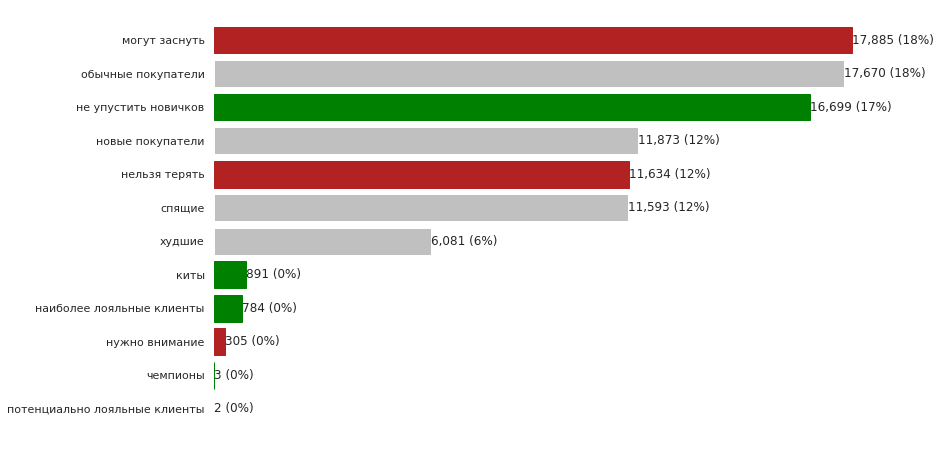

In [81]:
# Построим диаграмму распределения клиентов по RFM-сегментам.
# Пометим красным цветом сегменты с требующими внимания клиентами,
# а зелёным цветом - самые выгодные сегменты.

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
    value = bar.get_width()
    if segments_counts.index[i] in ['чемпионы', 'наиболее лояльные клиенты', 
                                    'не упустить новичков', 
                                    'киты']:
        bar.set_color('green')
    if segments_counts.index[i] in ['нужно внимание', 'могут заснуть', 
                                    'нельзя терять']:
        bar.set_color('firebrick')
    ax.text(value,
            bar.get_y() + bar.get_height()/2,
            '{:,} ({:}%)'.format(int(value),
                               int(value*100/segments_counts.sum())),
            va='center',
            ha='left'
           )

print('Распределение клиентов по RFM-сегментам:\n')
plt.show()

In [83]:
# Сравним суммарное количество клиентов, требующих внимание, и наиболее выгодных.

best_customers = 0
risk_customers = 0
rest_customers = 0
for row in rfm.itertuples():
    if row.segment_name in ['чемпионы', 'наиболее лояльные клиенты', 'не упустить новичков', 'киты']:
        best_customers += 1
    elif row.segment_name in ['нужно внимание', 'могут заснуть', 'нельзя терять']:
        risk_customers += 1
    else:
        rest_customers += 1

print('Суммарное количество лучших клиентов =', best_customers)
print('Суммарное количество клиентов в зоне риска =', risk_customers)
print('Суммарное количество остальных клиентов =', rest_customers)
print('Суммарное количество клиентов в зоне риска превышает количество лучших клиентов на',
      risk_customers - best_customers)

Суммарное количество лучших клиентов = 18377
Суммарное количество клиентов в зоне риска = 29824
Суммарное количество остальных клиентов = 47219
Суммарное количество клиентов в зоне риска превышает количество лучших клиентов на 11447


In [86]:
# Дополнительно можно посмотреть среднее значение RFM-score по штатам.
# Для этого присоединяем таблицу клиентов и группируем данные по штатам.

rfm_by_state = rfm.merge(customers, on='customer_unique_id', how='inner')
rfm_by_state = rfm_by_state.groupby('customer_state', as_index=False) \
    .agg({'RFM_score':'mean'}) \
    .rename(columns = {'RFM_score':'avg_RFM_score'})
rfm_by_state.sort_values('avg_RFM_score', ascending=False)

,customer_state,avg_RFM_score
14,PB,2.123790
3,AP,2.112941
15,PE,2.078865
16,PI,2.071134
12,MT,2.070410
6,DF,2.061570
26,TO,2.059713
20,RO,2.052218
11,MS,2.051707
1,AL,2.051699


In [87]:
customers.query('customer_state == "PB"')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
530,f9498c1d633509de995d09aeee4f67c9,374026021639ada6e97c12b31a997a64,58407,campina grande,PB
816,5c296f7939550b876425980a5d7da5ce,51e96af5f0314b37ecdc524b4c44c06a,58011,joao pessoa,PB
1762,647f99eb0007e6db23fa6ad97b03b1db,237d81d316c9afc1b1476200408455d8,58155,soledade,PB
2176,7bef0b4674da88edebc39071240600b4,f13d52604bb35cd3e253bee5b28a4386,58220,bananeiras,PB
2215,73464d896b5905196286e7edefa9840f,3ed5ee72812f14afefbf03c357c56684,58380,inga,PB
...,...,...,...,...,...
96733,d486c1adfb84aecbc44d77cf332b0cd1,81dd84d8f44d7aac9fa58e473583586a,58540,sume,PB
97160,79e9e3045681a5b732e05d595a74f10b,94c41896e17a558189de6da770eb229d,58036,joao pessoa,PB
97712,77c721e43535d1b1a32274302b157024,f9597fc39b81c06da320d20e25f3a2c7,58550,prata,PB
98057,3c5846b47d54a0d65ba29fa2ff9e25a1,007658319c060f337577e8a1834d5df5,58025,joao pessoa,PB


### После проведенного RFM-анализа можно сделать следующие выводы:
Среди самых выгодных сегментов наибольшим по количеству является сегмент 'не упустить новичков' (пользователи, совсем недавно купившие много дешевых товаров или немного дорогих товаров).
Среди находящихся в зоне риска сегментов наибольшим по количеству является сегмент 'могут заснуть' (пользователи, давно купившие какие-то не самые дорогие товары).
В сегменте 'чемпионы' находится всего несколько клиентов, что гораздо ниже по сравнению с количеством клиентов из сегментов 'наиболее лояльные клиенты' и 'киты', из которых вполне можно получить дополнительных 'чемпионов'.
Наибольшего внимания из сегментов, находящихся в зоне риска, требуют сегменты 'могут заснуть' и 'нельзя терять'.
Количество спящих такое же, как и количество новых покупателей. При расчёте среднего значения RFM-score по штатам выяснилось, что клиенты из американского штата Джорджия (AC) имеют самый низкий показатель, а клиенты из бразильского штата Параиба (PB) - самый высокий, однако диапазон средних по всем штатам не настолько сильно колеблется. В целом сегментация RFM могла бы быть более адаптированной к специфике товаров, если бы мы знали, какие именно товары доставляются.

### Основные выводы: 
1) Этот интернет магазин еще развивается и набирает покупателей (всего 2 года жизни).

2) Несмотря на то, что лояльность основной части пользователей кажется весьма низкой по результатам когортного анализа для retention rate, речь возможно идёт о товарах долгосрочного использования.

3) Надо проводить маркетинговые кампании, нацеленные как на удержание более активных пользователей из сегментов "не упустить новичков", "киты", так и на побуждение вернуться для сегментов "спящие", "могут заснуть", "нужно внимание", "нельзя терять".